In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
from pymongo import MongoClient
from smartenergy.database.preprocessing import preprocess, group_data_hourly
from smartenergy.database.mongo_queries import load_all_stations_first_n

from IPython.core.display import display, HTML
from jupyterthemes import jtplot
jtplot.style('onedork')

np.warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
display(HTML("<style>.container { width: 1480px !important; }</style>"))

In [2]:
%%time
client = MongoClient(host='127.0.0.1', port=27017)
db = client['energy']

data = load_all_stations_first_n(db.measurements, int(1e10))
data = preprocess(data)
currents = ['fILoadDirect_avg', 'fILoad_avg', 'fIPV_avg', 'fIExcess_avg', 'fIToGrid_avg', 'fIToBat_avg', 'fTemperature_avg']
stations = list(data.index.get_level_values(0).unique())

CPU times: user 1min 53s, sys: 17.1 s, total: 2min 10s
Wall time: 2min 38s


In [3]:
print(data.shape)
data.head()

(1186431, 19)


fILoadDirect_avg  fILoad_avg  fIPV_avg  \
solbox_id datetime                                                      
30        2017-10-30 06:02:24            148.76     1858.93   1102.55   
          2017-10-30 06:04:26            148.79     1858.73   1102.41   
          2017-10-30 06:06:31            148.78     1858.57   1102.35   
          2017-10-30 06:08:34            148.83     1860.32   1102.88   
          2017-10-30 06:10:29            148.90     1861.21   1103.09   

                               fIToGrid_avg  fIExcess_avg  fIToBat_avg  year  \
solbox_id datetime                                                             
30        2017-10-30 06:02:24          5.12          0.29       -61.06  2017   
          2017-10-30 06:04:26          5.05          0.29       -60.93  2017   
          2017-10-30 06:06:31          5.01          0.29       -60.80  2017   
          2017-10-30 06:08:34          5.49          0.29       -62.49  2017   
          2017-10-30 06:10:29          5.64          0.29       -63.34  2017   

                               month  week  weekday  day  hour  u8UserMode  \
solbox_id datetime                                                           
30        2017-10-30 06:02:24     10    44        0   30     6           0   
          2017-10-30 06:04:26     10    44        0   30     6           0   
          2017-10-30 06:06:31     10    44        0   30     6           0   
          2017-10-30 06:08:34     10    44        0   30     6           0   
          2017-10-30 06:10:29     10    44        0   30     6           0   

                               u8StateOfBattery  u32TotalBought  u32TotalSold  \
solbox_id datetime                                                              
30        2017-10-30 06:02:24                 3            1186         64891   
          2017-10-30 06:04:26                 3            1186         64891   
          2017-10-30 06:06:31                 3            1186         64891   
          2017-10-30 06:08:34                 3            1186         64891   
          2017-10-30 06:10:29                 3            1186         64891   

                               fBuyPrice  fSellPrice  fTemperature_avg  
solbox_id datetime                                                      
30        2017-10-30 06:02:24       1.92        1.20             26.06  
          2017-10-30 06:04:26       1.92        1.20             26.05  
          2017-10-30 06:06:31       1.92        1.20             26.03  
          2017-10-30 06:08:34       1.92        1.20             26.03  
          2017-10-30 06:10:29       1.92        1.20             26.05

In [4]:
data_hourly = group_data_hourly(data)
print(data_hourly.shape)
data_hourly.head()

(44462, 19)


year  month  day  hour  fILoadDirect_avg  \
solbox_id datetime                                                        
30        2017-10-30 06:00:00  2017     10   30     6            148.87   
          2017-10-30 07:00:00  2017     10   30     7            148.85   
          2017-10-30 08:00:00  2017     10   30     8            148.76   
          2017-10-30 09:00:00  2017     10   30     9            148.61   
          2017-10-30 10:00:00  2017     10   30    10            148.43   

                               fILoad_avg  fIPV_avg  fIToGrid_avg  \
solbox_id datetime                                                  
30        2017-10-30 06:00:00     1859.72   1102.78          5.33   
          2017-10-30 07:00:00     1860.86   1105.25          5.27   
          2017-10-30 08:00:00     1861.29   1103.83          5.49   
          2017-10-30 09:00:00     1861.77   1104.17          5.56   
          2017-10-30 10:00:00     1861.88   1104.43          5.86   

                               fIExcess_avg  fIToBat_avg  week  weekday  \
solbox_id datetime                                                        
30        2017-10-30 06:00:00          0.29       -61.84 44.00     0.00   
          2017-10-30 07:00:00          0.29       -60.46 44.00     0.00   
          2017-10-30 08:00:00          0.29       -62.51 44.00     0.00   
          2017-10-30 09:00:00          0.29       -62.73 44.00     0.00   
          2017-10-30 10:00:00          0.29       -62.88 44.00     0.00   

                               u8UserMode  u8StateOfBattery  u32TotalBought  \
solbox_id datetime                                                            
30        2017-10-30 06:00:00        0.00              3.00         1186.00   
          2017-10-30 07:00:00        0.00              3.00         1186.00   
          2017-10-30 08:00:00        0.00              3.00         1186.00   
          2017-10-30 09:00:00        0.00              3.00         1186.00   
          2017-10-30 10:00:00        0.00              3.00         1186.00   

                               u32TotalSold  fBuyPrice  fSellPrice  \
solbox_id datetime                                                   
30        2017-10-30 06:00:00      64891.00       1.92        1.20   
          2017-10-30 07:00:00      64891.00       1.92        1.20   
          2017-10-30 08:00:00      64891.00       1.92        1.20   
          2017-10-30 09:00:00      64891.00       1.92        1.20   
          2017-10-30 10:00:00      64891.00       1.92        1.20   

                               fTemperature_avg  
solbox_id datetime                               
30        2017-10-30 06:00:00             26.03  
          2017-10-30 07:00:00             25.97  
          2017-10-30 08:00:00             26.16  
          2017-10-30 09:00:00             26.49  
          2017-10-30 10:00:00             26.82

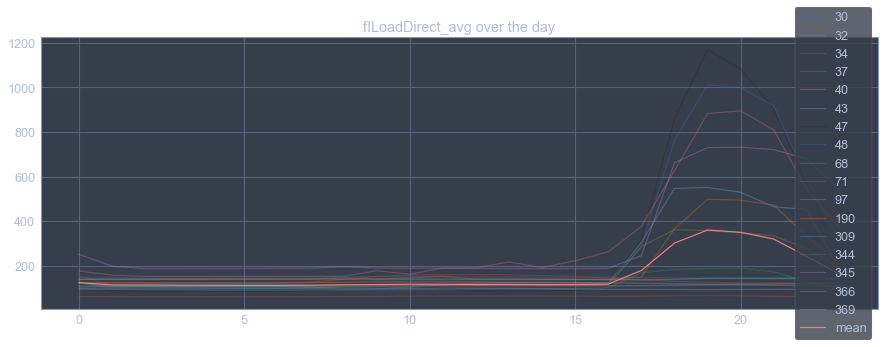

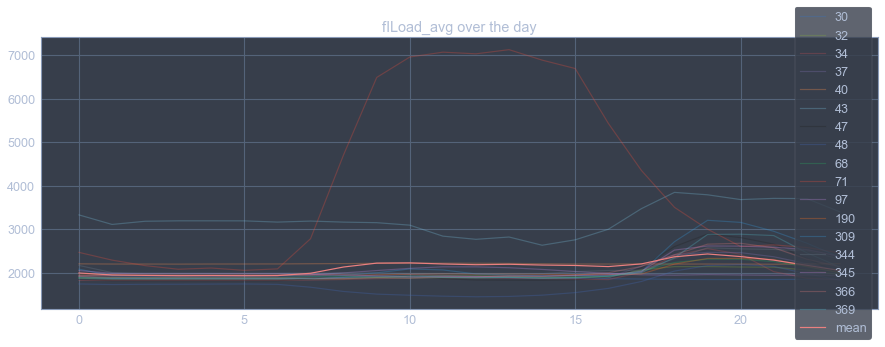

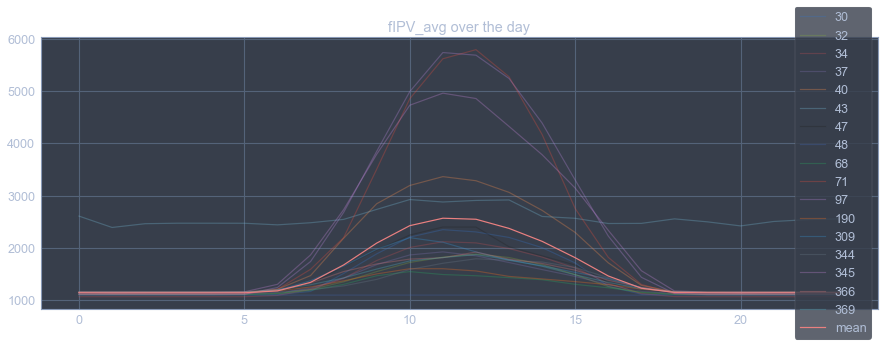

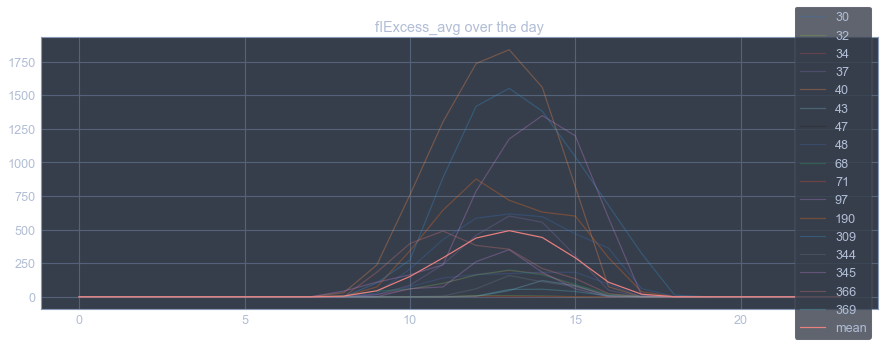

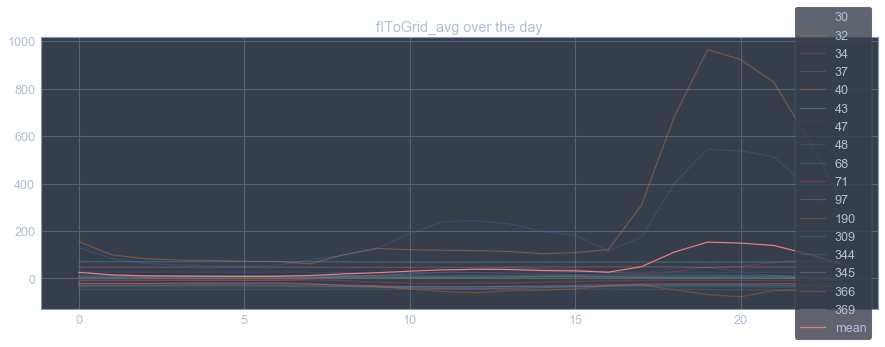

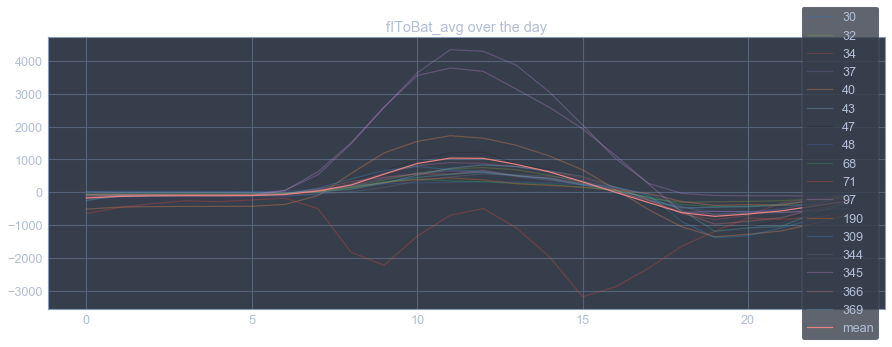

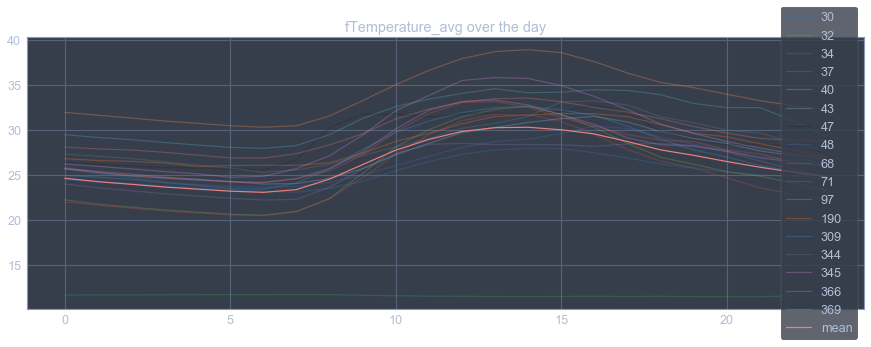

In [5]:
# Visualize voltages over the day
for var in currents:
    plt.figure(figsize=(15, 5))
    for station in stations:
        plt.plot(data_hourly.loc[station].groupby('hour')[var].mean(), label=station, alpha=0.3)
        
    plt.plot(data_hourly.groupby('hour')[var].mean(), label='mean')
    plt.title('{} over the day'.format(var))
    plt.legend(loc='right')
    plt.show()

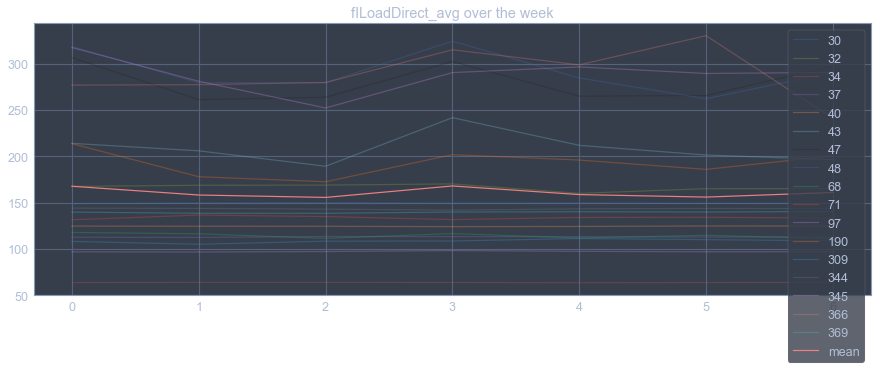

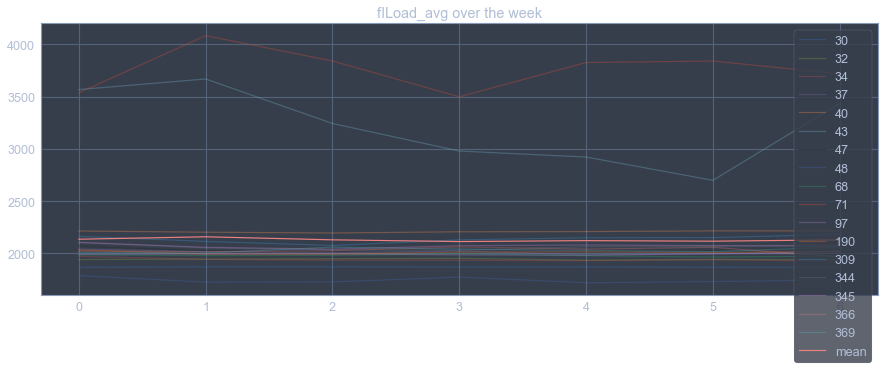

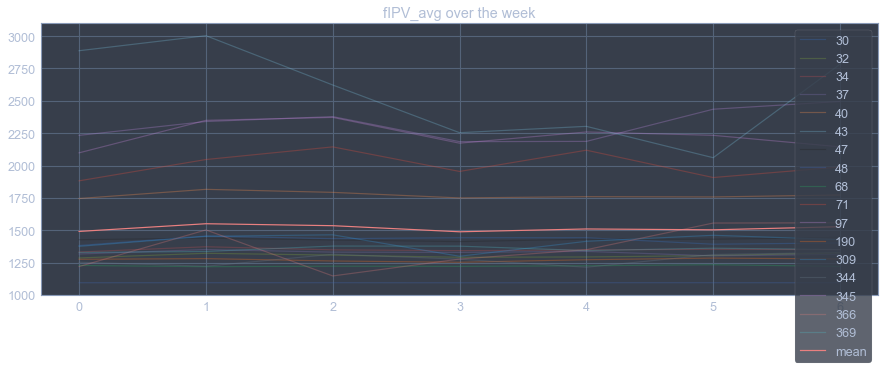

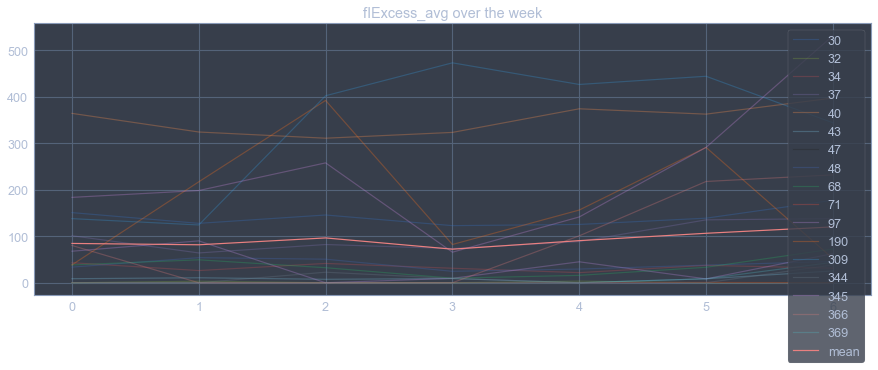

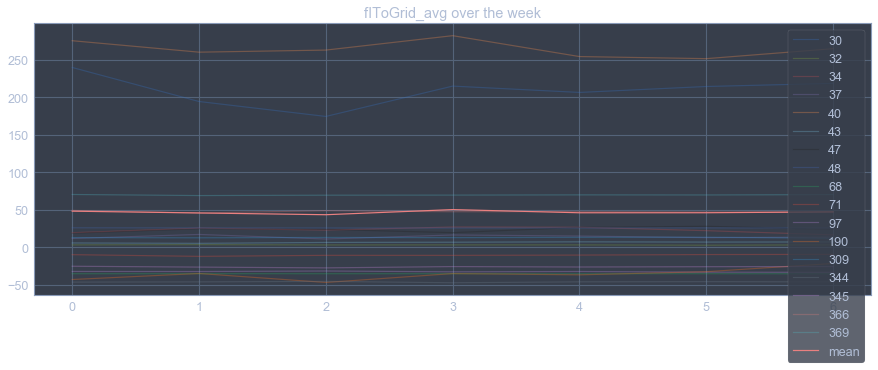

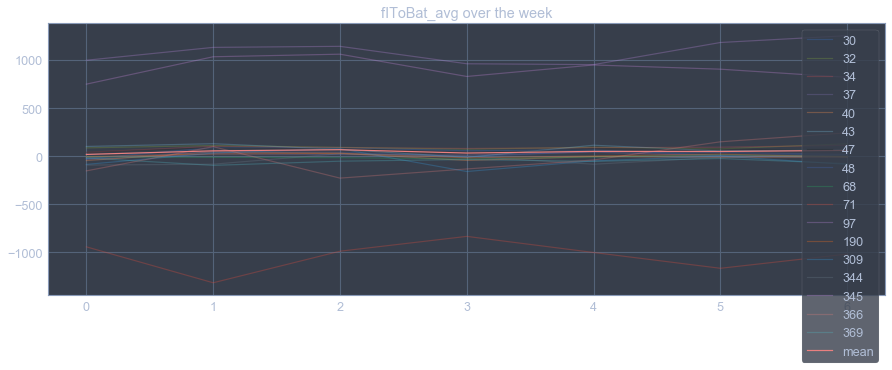

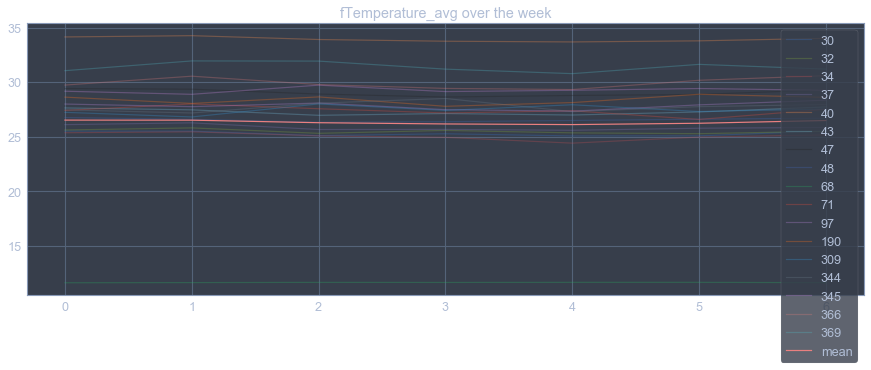

In [6]:
# Visualize voltages over the week
for var in currents:
    plt.figure(figsize=(15, 5))
    for station in stations:
        plt.plot(data_hourly.loc[station].groupby('weekday')[var].mean(), label=station, alpha=0.3)
        
    plt.plot(data_hourly.groupby('weekday')[var].mean(), label='mean')
    plt.title('{} over the week'.format(var))
    plt.legend()
    plt.show()

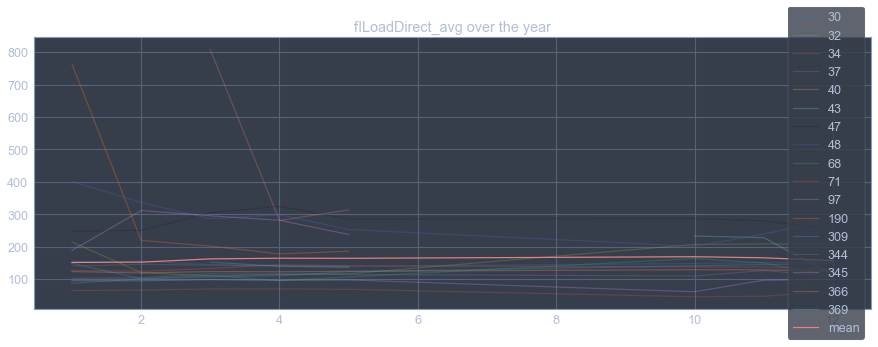

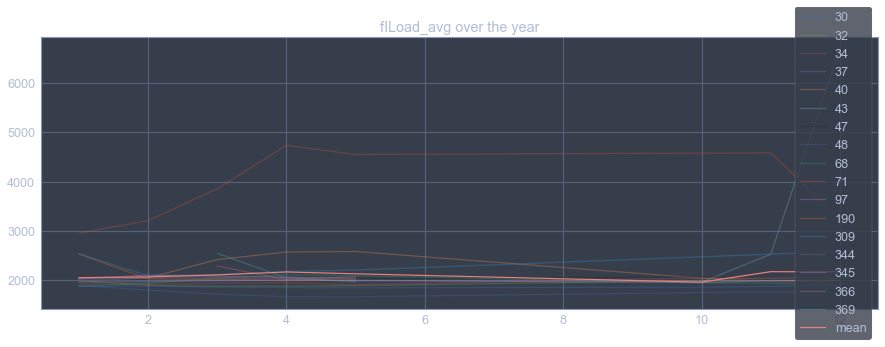

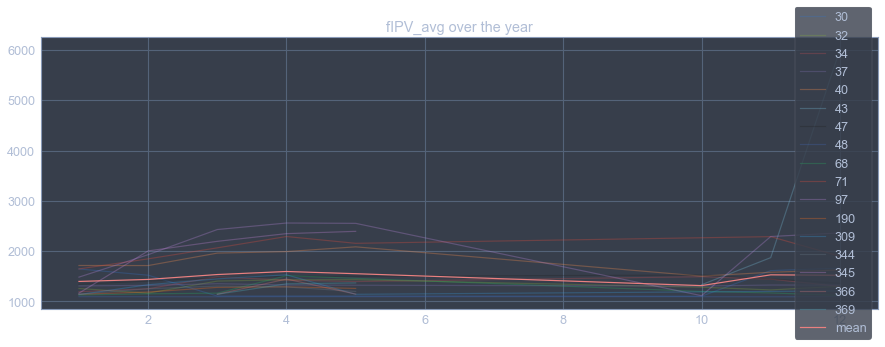

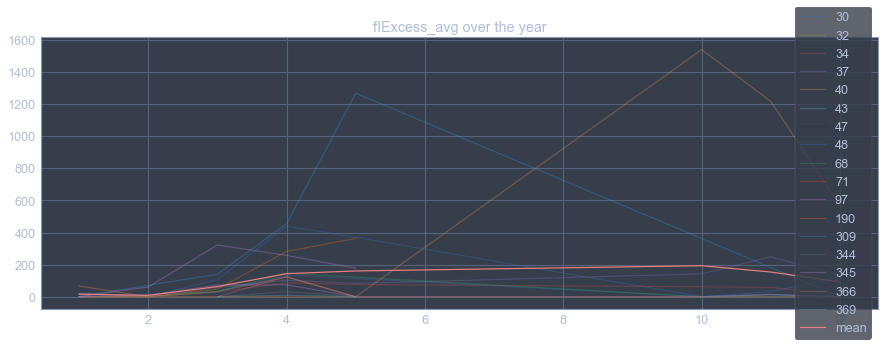

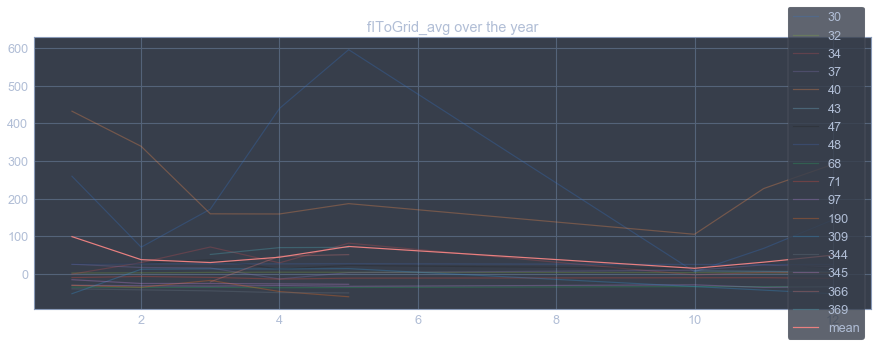

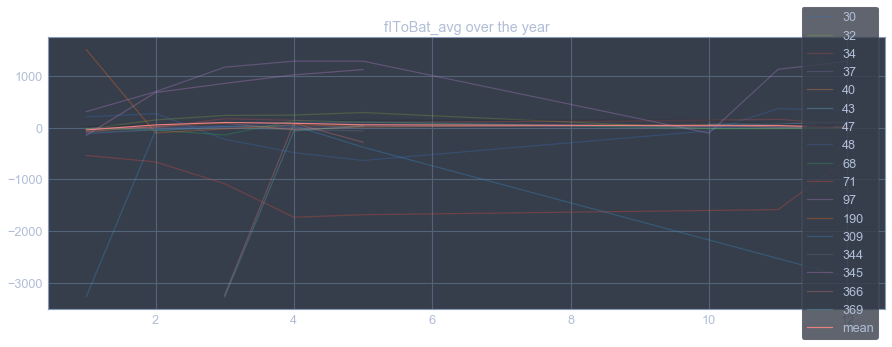

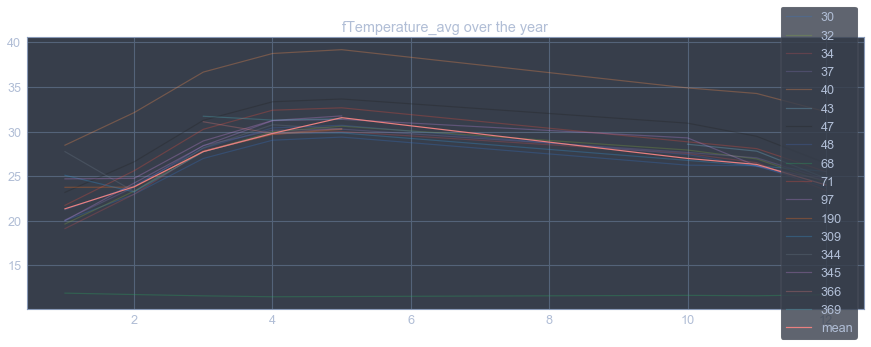

In [7]:
# Visualize voltages over the year
for var in currents:
    plt.figure(figsize=(15, 5))
    for station in stations:
        plt.plot(data_hourly.loc[station].groupby('month')[var].mean(), label=station, alpha=0.3)
        
    plt.plot(data_hourly.groupby('month')[var].mean(), label='mean')
    plt.title('{} over the year'.format(var))
    plt.legend(loc='right')
    plt.show()

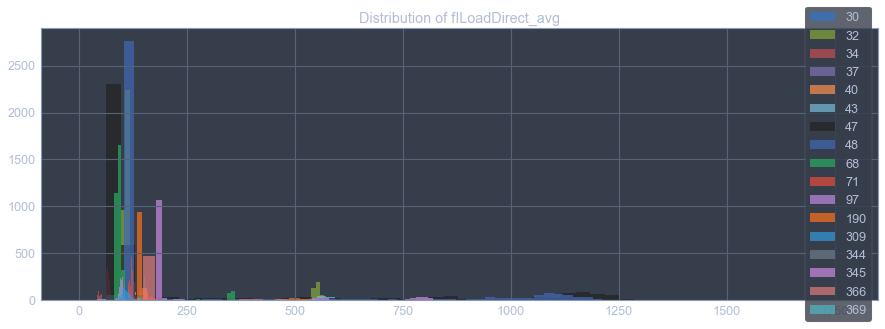

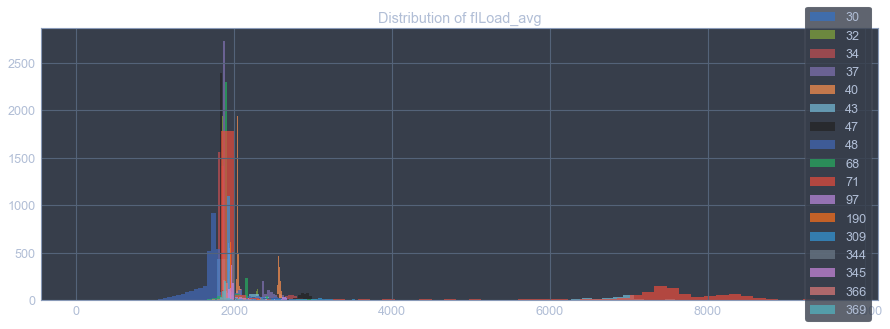

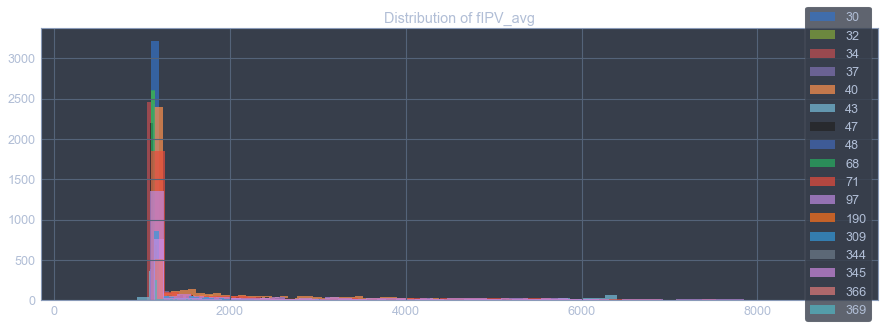

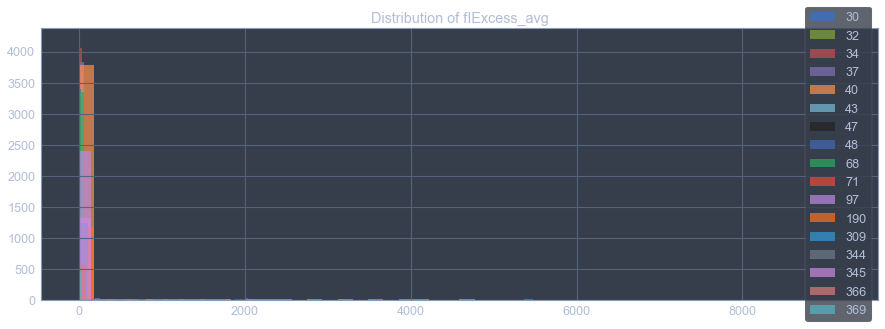

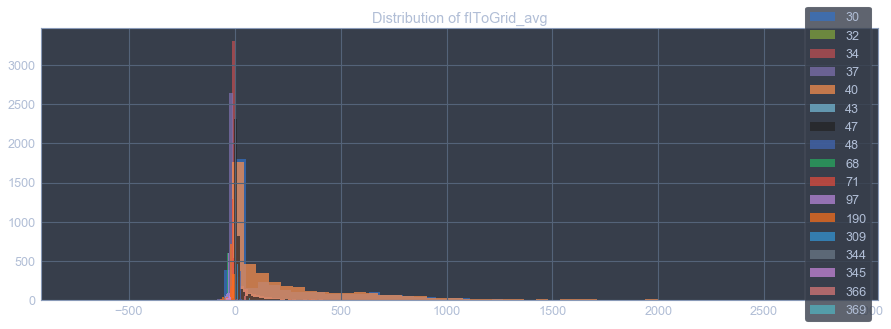

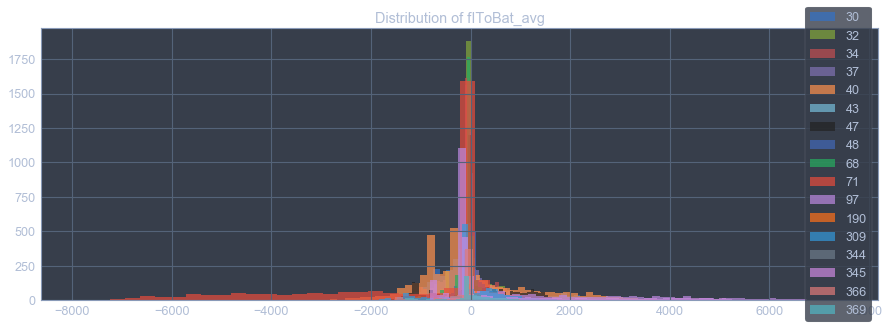

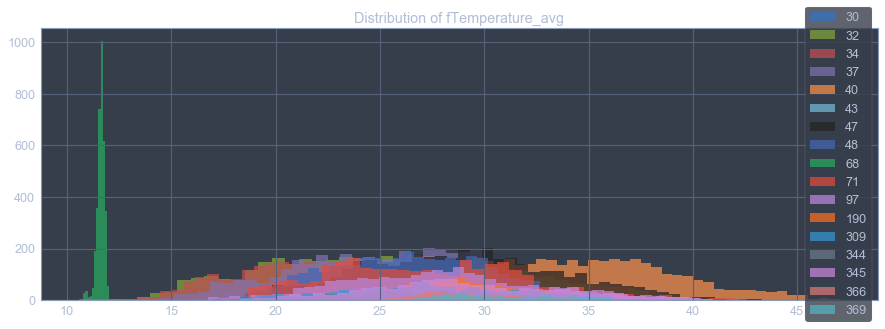

In [8]:
for var in currents:
    plt.figure(figsize=(15, 5))
    for station in stations:
        plt.hist(data_hourly.loc[station, var].dropna().values, bins=50, label=str(station), alpha=0.7)
        
    plt.title('Distribution of {}'.format(var))
    plt.legend(loc='right')
    plt.show()

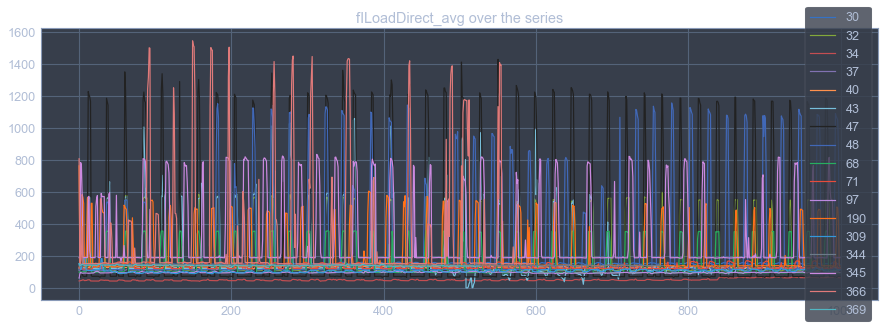

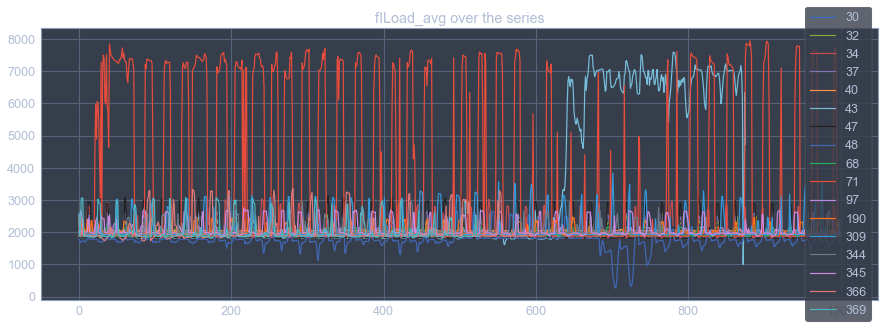

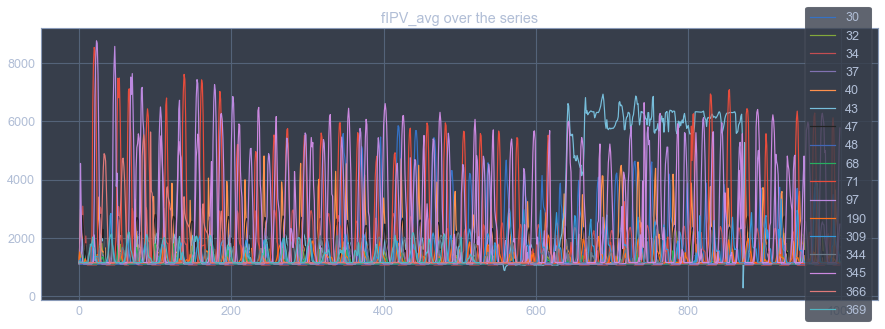

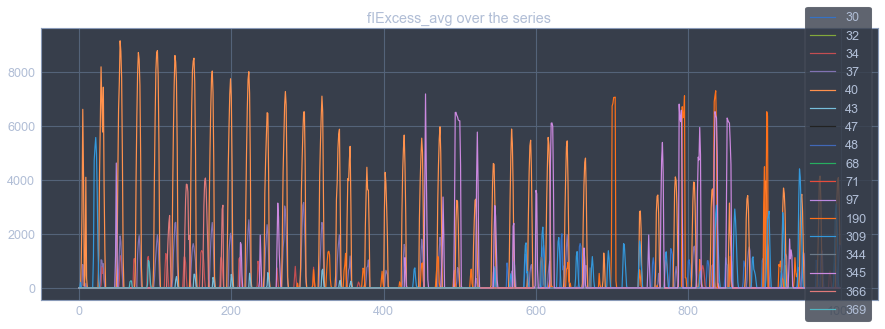

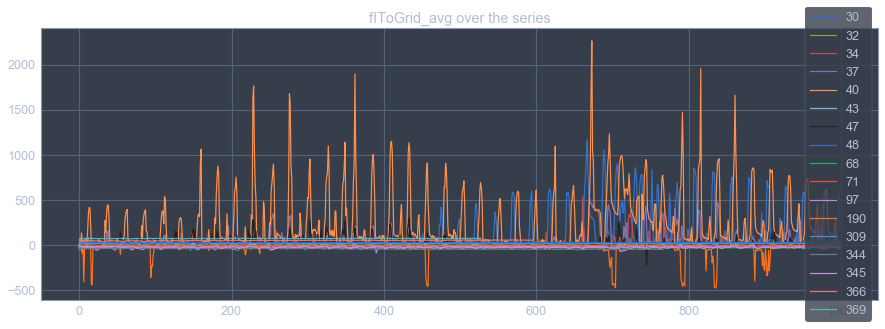

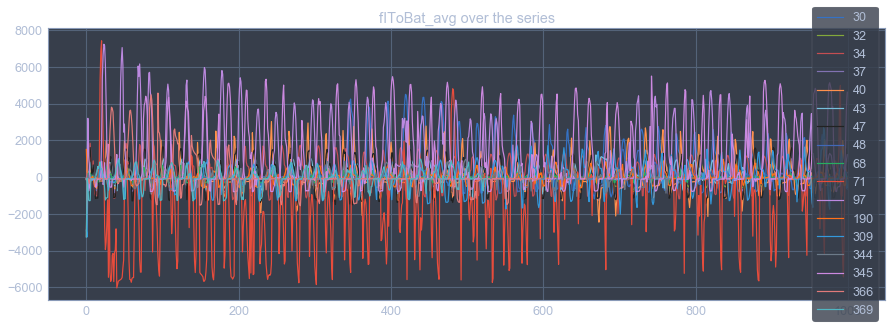

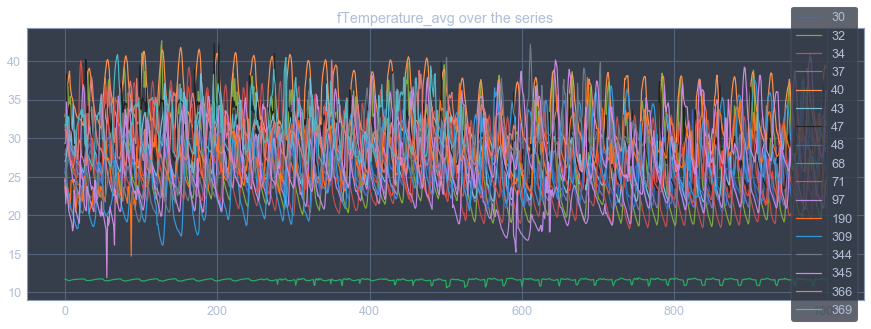

In [9]:
for var in currents:
    plt.figure(figsize=(15, 5))
    for station in stations:
        plt.plot(data_hourly.loc[station, var].iloc[:1000].values, label=station)
        
    plt.title('{} over the series'.format(var))
    plt.legend(loc='right')
    plt.show()

### Exploration ideas
1. - How much energy doesn't get used because of the battery being full and nobody buying energy?

In [10]:
data['fILoad_avg'].groupby('solbox_id').sum()

solbox_id
30    205640734.13
32    217659714.76
34    222398882.83
37    223928882.74
40    255828065.35
43     70517306.56
47    209942208.30
48    169176563.48
68    184663934.33
71    279984506.81
97    127742884.81
190    69811330.98
309    86372551.94
344    38941165.74
345    80080339.66
366    32747086.35
369    28503598.06
Name: fILoad_avg, dtype: float64

In [11]:
data['fIExcess_avg'].groupby('solbox_id').sum()

solbox_id
30    15993500.48
32      156635.19
34     4056492.67
37    10777028.89
40    41701122.50
43      247202.47
47       44646.31
48     4110832.81
68     3487235.98
71       30712.29
97     2759011.03
190    6142705.36
309   13666258.34
344     201152.16
345    9363172.98
366    1633134.41
369     106171.30
Name: fIExcess_avg, dtype: float64

In [12]:
#1. - How much energy doesn't get used because of the battery being full and nobody buying energy?
data['fIExcess_avg'].groupby('solbox_id').sum() / data['fILoad_avg'].groupby('solbox_id').sum()
data['fIExcess_avg'].groupby('solbox_id').sum().sum() / data['fILoad_avg'].groupby('solbox_id').sum().sum()

0.04571875775270569

In [13]:
## Modelling